In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/freyci/Desktop/Spaceapps Challenge/dsc_fc_summed_spectra_2023_v01.csv'
data = pd.read_csv(file_path, header=None)

# Display basic information and statistics
basic_info = data.info()
basic_statistics = data.describe()

# Check for null values in the data
null_values = data.isnull().sum()

# Visualize first few rows of the data
sample_data = data.head()

basic_info, basic_statistics, null_values, sample_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175680 entries, 0 to 175679
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       175680 non-null  object 
 1   1       174655 non-null  float64
 2   2       174655 non-null  float64
 3   3       174655 non-null  float64
 4   4       175680 non-null  float64
 5   5       175680 non-null  float64
 6   6       175680 non-null  float64
 7   7       175680 non-null  float64
 8   8       175680 non-null  float64
 9   9       175680 non-null  float64
 10  10      175680 non-null  float64
 11  11      175680 non-null  float64
 12  12      175680 non-null  float64
 13  13      175680 non-null  float64
 14  14      175680 non-null  float64
 15  15      175680 non-null  float64
 16  16      175680 non-null  float64
 17  17      175680 non-null  float64
 18  18      175680 non-null  float64
 19  19      175680 non-null  float64
 20  20      175680 non-null  float64
 21  21      17

(None,
                   1              2              3              4   \
 count  174655.000000  174655.000000  174655.000000  175680.000000   
 mean        0.385333      -0.453561      -0.002434       5.306328   
 std         4.091436       4.971768       4.229893      15.913668   
 min       -17.737500     -31.785100     -30.211400       0.000000   
 25%        -2.956335      -3.658545      -2.375695       0.442794   
 50%         0.952714      -0.716688       0.040742       1.557180   
 75%         3.595985       2.922615       2.411265       5.055515   
 max        33.049400      23.377800      27.988900     490.107000   
 
                   5              6              7              8   \
 count  175680.000000  175680.000000  175680.000000  175680.000000   
 mean        0.297891       9.265289       6.335683      13.753287   
 std         2.461625      17.750383      13.613345      17.204161   
 min         0.000000       0.000000       0.000000       0.000000   
 25%       

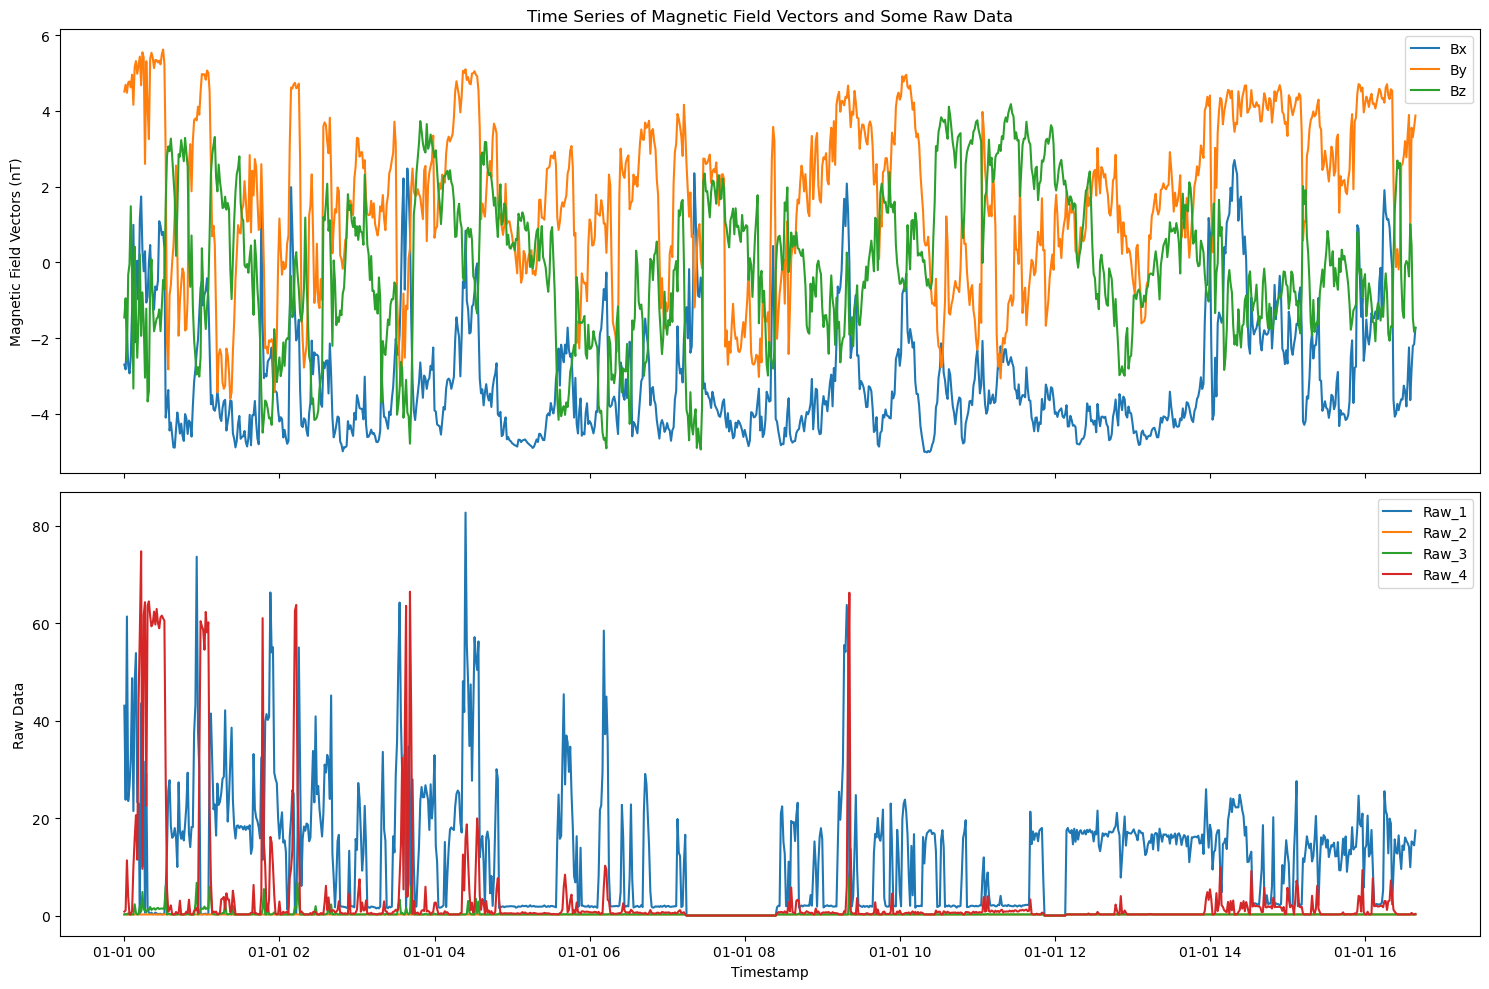

In [5]:
# Convert the timestamp column to DateTime type and set it as the index
data[0] = pd.to_datetime(data[0])
data.set_index(0, inplace=True)

# Plotting the magnetic field vectors (columns 1-3) and some raw data (columns 4-7) for a subset of data
subset_data = data.head(1000)  # Taking a subset for clearer visualization

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
axs[0].plot(subset_data.index, subset_data.iloc[:, 0:3])
axs[0].set_ylabel('Magnetic Field Vectors (nT)')
axs[0].legend(['Bx', 'By', 'Bz'])
axs[0].set_title('Time Series of Magnetic Field Vectors and Some Raw Data')

axs[1].plot(subset_data.index, subset_data.iloc[:, 3:7])
axs[1].set_ylabel('Raw Data')
axs[1].set_xlabel('Timestamp')
axs[1].legend(['Raw_1', 'Raw_2', 'Raw_3', 'Raw_4'])

plt.tight_layout()
plt.show()

In [6]:
# Anomaly Analysis for Raw Data

# Calculate the mean and standard deviation for each raw data column
mean_values = data.iloc[:, 3:].mean()
std_values = data.iloc[:, 3:].std()

# Define thresholds for anomalies (mean +/- 3*std for this example)
upper_threshold = mean_values + 3 * std_values
lower_threshold = mean_values - 3 * std_values

# Identify anomalies
anomalies = (data.iloc[:, 3:] > upper_threshold) | (data.iloc[:, 3:] < lower_threshold)

# Count anomalies for each column
anomaly_counts = anomalies.sum()

anomaly_counts

4     1809
5      228
6     1534
7     1620
8     1431
9     2693
10    2523
11    2929
12    3005
13    3403
14    3367
15    3262
16    2565
17    2499
18    2014
19    1834
20     978
21    1777
22    8943
23    9398
24    1908
25    1573
26     979
27    1472
28     609
29    1112
30     578
31     429
32     863
33     486
34     282
35     747
36     844
37    1991
38    1116
39    2104
40    4712
41    7792
42    5633
43    4552
44    1977
45    1549
46    1210
47     277
48     254
49     193
50     173
51     166
52      17
53      14
dtype: int64

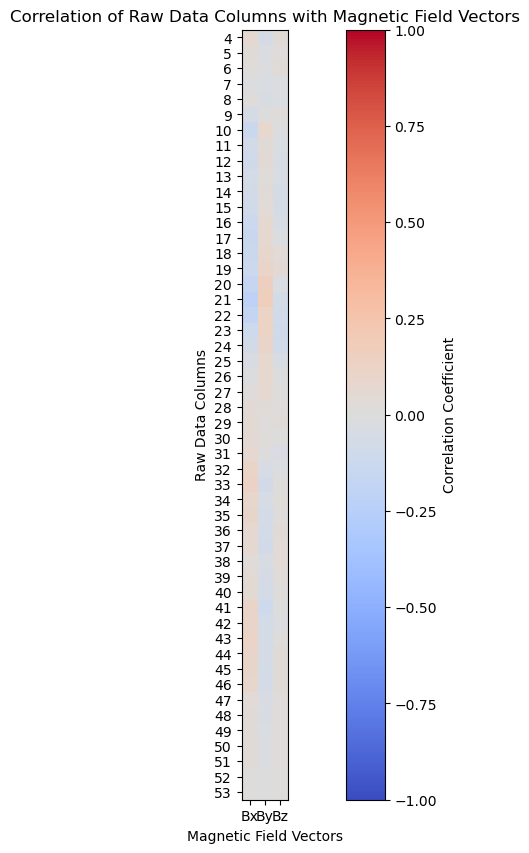

In [8]:
# Compute the correlation between magnetic field vectors and raw data columns
correlation_matrix = data.iloc[:, :].corr()

# Extract correlations of magnetic field vectors with raw data columns
correlations_with_magnetic_fields = correlation_matrix.iloc[3:, 0:3]

# Visualize these correlations
plt.figure(figsize=(15, 10))
plt.imshow(correlations_with_magnetic_fields, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.yticks(range(len(correlations_with_magnetic_fields.index)), correlations_with_magnetic_fields.index)
plt.xticks(range(3), ['Bx', 'By', 'Bz'])
plt.title('Correlation of Raw Data Columns with Magnetic Field Vectors')
plt.ylabel('Raw Data Columns')
plt.xlabel('Magnetic Field Vectors')
plt.grid(False)
plt.show()


In [9]:
# Generate lagged features for the magnetic field vectors and some raw data columns
lagged_data = data.copy()
number_of_lags = 3

for col in range(1, 8):  # For Bx, By, Bz, and Raw_1 to Raw_4
    for lag in range(1, number_of_lags + 1):
        lagged_data[f"{col}_lag_{lag}"] = lagged_data[col].shift(lag)

# Drop NaN values after creating lagged features
lagged_data.dropna(inplace=True)

# Display the first few rows with new lagged features
lagged_data.head()

,1,2,3,4,5,6,7,8,9,10,...,4_lag_3,5_lag_1,5_lag_2,5_lag_3,6_lag_1,6_lag_2,6_lag_3,7_lag_1,7_lag_2,7_lag_3
0,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:03:00,-2.715410,4.74902,-0.324706,23.4895,0.231726,0.460690,3.708190,8.674410,0.231726,2.614280,...,43.0445,0.231726,0.231726,0.231726,0.231726,0.315117,0.231726,11.327000,1.063280,0.818269
2023-01-01 00:04:00,-2.933420,4.77895,-0.047584,26.5171,0.231726,0.231726,0.231726,10.463200,0.231726,0.231726,...,23.7566,0.231726,0.231726,0.231726,0.460690,0.231726,0.315117,3.708190,11.327000,1.063280
2023-01-01 00:05:00,-2.503210,4.62046,1.482700,32.2337,0.231726,0.231726,0.263955,14.159100,0.231726,0.231726,...,61.3445,0.231726,0.231726,0.231726,0.231726,0.460690,0.231726,0.231726,3.708190,11.327000
2023-01-01 00:06:00,-1.229150,4.95677,-0.483142,48.6884,0.231726,0.231726,0.968737,17.847400,0.231726,0.231726,...,23.4895,0.231726,0.231726,0.231726,0.231726,0.231726,0.460690,0.263955,0.231726,3.708190
2023-01-01 00:07:00,0.990381,4.16133,-3.334350,21.4463,0.231726,0.231726,9.893420,0.564611,0.231726,0.266455,...,26.5171,0.231726,0.231726,0.231726,0.231726,0.231726,0.231726,0.968737,0.263955,0.231726


In [ ]:
import pandas as pd

# Load the data
data_cleaned = pd.read_csv('/path/to/your/file/dsc_fc_summed_spectra_2023_v01.csv', header=None)

# Handle Missing Values
data_cleaned.dropna(inplace=True)

# Rename Columns
column_names = ["Timestamp", "Bx", "By", "Bz"] + [f"Raw_{i}" for i in range(1, 51)]
data_cleaned.columns = column_names

# Set timestamp as the index
data_cleaned["Timestamp"] = pd.to_datetime(data_cleaned["Timestamp"])
data_cleaned.set_index("Timestamp", inplace=True)

# Display the cleaned and renamed data
print(data_cleaned.head())